In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


dictionary = pd.read_excel('dataset/Data Dictionary.xls', header=1)
dictionary

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


In [2]:
# for var, desc, type_ in dictionary.values:
#     print(f'- {var} [{type_}]\n{desc}\n')

| **Колонка**                                         | **Описание**                                                                                                                                                             |
|-----------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `SeriousDlqin2yrs` (bool)                           | Была ли просрочка более 90 дней за последние 2 года (необходимо предсказать).                                                                                           |
| `RevolvingUtilizationOfUnsecuredLines` (%)          | Отношение денег, взятых в кредит, к суммарному лимиту по всем кредитам (кредитные карты, личные кредиты и т.д.).                                                        |
| `age` (int)                                         | Возраст клиента.                                                                                                                                                        |
| `NumberOfTime30-59DaysPastDueNotWorse` (int)         | Количество просрочек по кредиту на 30-59 дней за последние 2 года.                                                                                                    |
| `DebtRatio` (%)                                     | Ежемесячные выплаты по долгам, алиментам, расходы на проживание, разделённые на ежемесячный валовой доход.                                                              |
| `MonthlyIncome` (real)                              | Месячный доход (возможно, валовой доход).                                                                                                                                |
| `NumberOfOpenCreditLinesAndLoans` (int)             | Количество открытых кредитов и кредитных линий (например, автокредит, ипотека).                                                                                        |
| `NumberOfTimes90DaysLate` (int)                     | Количество просрочек по кредиту на 90 или более дней.                                                                                                                   |
| `NumberRealEstateLoansOrLines` (int)                | Количество ипотечных кредитов и кредитных линий на недвижимость.                                                                                                       |
| `NumberOfTime60-89DaysPastDueNotWorse` (int)        | Количество просрочек по кредиту на 60-89 дней за последние 2 года.                                                                                                    |
| `NumberOfDependents` (int)                          | Количество иждивенцев в семье, не считая самого клиента (супруг(а), дети и т.д.).                                                                                      |


In [3]:
df_train = pd.read_csv('dataset/cs-training.csv')
df_test = pd.read_csv('dataset/cs-test.csv')

df_train.head(3)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [4]:
df_train.drop('Unnamed: 0', axis=1, inplace=True)
df_test.drop('Unnamed: 0', axis=1, inplace=True)

df_train.head(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [5]:
df_train.shape, df_test.shape

((150000, 11), (101503, 11))

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [7]:
df_train.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')
moda_imputer = SimpleImputer(strategy='most_frequent')

df_train['MonthlyIncome'] = median_imputer.fit_transform(df_train[['MonthlyIncome']])
df_train['NumberOfDependents'] = moda_imputer.fit_transform(df_train[['NumberOfDependents']])

df_test['MonthlyIncome'] = median_imputer.transform(df_test[['MonthlyIncome']])
df_test['NumberOfDependents'] = moda_imputer.transform(df_test[['NumberOfDependents']])

df_train.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [9]:
df_train.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,150000.0,6418.454920,12890.395542,0.0,3903.000000,5400.000000,7400.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [11]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RevolvingUtilizationOfUnsecuredLines,101503.0,5.310000,196.156039,0.0,0.030131,0.152586,0.564225,21821.0
age,101503.0,52.405436,14.779756,21.0,41.000000,52.000000,63.000000,104.0
NumberOfTime30-59DaysPastDueNotWorse,101503.0,0.453770,4.538487,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,101503.0,344.475020,1632.595231,0.0,0.173423,0.364260,0.851619,268326.0
MonthlyIncome,101503.0,6566.861048,32699.094034,0.0,3900.000000,5400.000000,7374.000000,7727000.0
NumberOfOpenCreditLinesAndLoans,101503.0,8.453514,5.144100,0.0,5.000000,8.000000,11.000000,85.0
NumberOfTimes90DaysLate,101503.0,0.296691,4.515859,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,101503.0,1.013074,1.110253,0.0,0.000000,1.000000,2.000000,37.0
NumberOfTime60-89DaysPastDueNotWorse,101503.0,0.270317,4.503578,0.0,0.000000,0.000000,0.000000,98.0


In [12]:
df_train.query('age < 18').shape # в тесте нет < 18 лет
df_train = df_train.query('age >= 18')

In [13]:
max_lates_30_59_count = (2 * 365) // 30 # сколько максимально раз можно было просрочить кредит на 30-59 дней за 2 года
df_train[df_train['NumberOfTime30-59DaysPastDueNotWorse'] > max_lates_30_59_count].shape
df_train[df_train['NumberOfTime30-59DaysPastDueNotWorse'] > max_lates_30_59_count]['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
1    147
0    122
Name: count, dtype: int64

In [14]:
max_lates_90_count = (2 * 365) // 90 # сколько можно было раз просрочить на 90 дней кредит за 2 года
df_train.query('NumberOfTimes90DaysLate > @max_lates_90_count').shape
df_train[df_train['NumberOfTimes90DaysLate'] > max_lates_90_count]['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
1    174
0    138
Name: count, dtype: int64

In [15]:
max_lates_60_89_count = (2 * 365) // 60 # сколько можно было раз просрочить на 60-89 дней кредит за 2 года
df_train[df_train['NumberOfTime60-89DaysPastDueNotWorse'] > max_lates_60_89_count].shape
df_train[df_train['NumberOfTime60-89DaysPastDueNotWorse'] > max_lates_60_89_count]['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
1    147
0    122
Name: count, dtype: int64

In [16]:
# # удаление всех аномальных выбросов

# print('Число строк до удаления:', df_train.shape[0])

# df_train = df_train[
#     (df_train['RevolvingUtilizationOfUnsecuredLines'] <= 100) &
#     (df_train['age'] >= 18) &
#     (df_train['NumberOfTime30-59DaysPastDueNotWorse'] <= max_lates_30_59_count) &
#     (df_train['NumberOfTime60-89DaysPastDueNotWorse'] <= max_lates_60_89_count) &
#     (df_train['NumberOfTimes90DaysLate'] <= max_lates_90_count)
# ]

# print('Число строк после удаления:', df_train.shape[0])

In [17]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,149999.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149999.0,6.048472,249.756203,0.0,0.029867,0.154176,0.559044,50708.0
age,149999.0,52.295555,14.771298,21.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149999.0,0.421029,4.192795,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,149999.0,353.007426,2037.825113,0.0,0.175074,0.366503,0.868257,329664.0
MonthlyIncome,149999.0,6418.457710,12890.438465,0.0,3903.000000,5400.000000,7400.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149999.0,8.452776,5.145964,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,149999.0,0.265975,4.169318,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,149999.0,1.018233,1.129772,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149999.0,0.240388,4.155193,0.0,0.000000,0.000000,0.000000,98.0


In [18]:
df_train.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         85
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114193
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

In [19]:
cat_features = df_train.columns[np.where(df_train.nunique() <= 30)[0]].tolist()
num_features = df_train.columns[np.where(df_train.nunique() > 30)[0]].tolist()

assert len(cat_features) + len(num_features) == df_train.shape[1]

Есть какие-то аномальные объекты в том числе и в тесте:

In [20]:
df_train[df_train['NumberOfTime60-89DaysPastDueNotWorse'] > 90]['SeriousDlqin2yrs'].shape

(269,)

In [21]:
df_train[
    (df_train['NumberOfTime30-59DaysPastDueNotWorse'] > 90) &
    (df_train['NumberOfTime60-89DaysPastDueNotWorse'] > 90) &
    (df_train['NumberOfTimes90DaysLate'] > 90)
]['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
1    147
0    122
Name: count, dtype: int64

In [22]:
df_test[
    (df_test['NumberOfTime30-59DaysPastDueNotWorse'] > 90) &
    (df_test['NumberOfTime60-89DaysPastDueNotWorse'] > 90) &
    (df_test['NumberOfTimes90DaysLate'] > 90)
].shape

(214, 11)

In [23]:
df_train[
    (df_train['NumberOfTime30-59DaysPastDueNotWorse'] > 3) &
    (df_train['NumberOfTime60-89DaysPastDueNotWorse'] > 3) &
    (df_train['NumberOfTimes90DaysLate'] > 3)
]['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
1    150
0    123
Name: count, dtype: int64

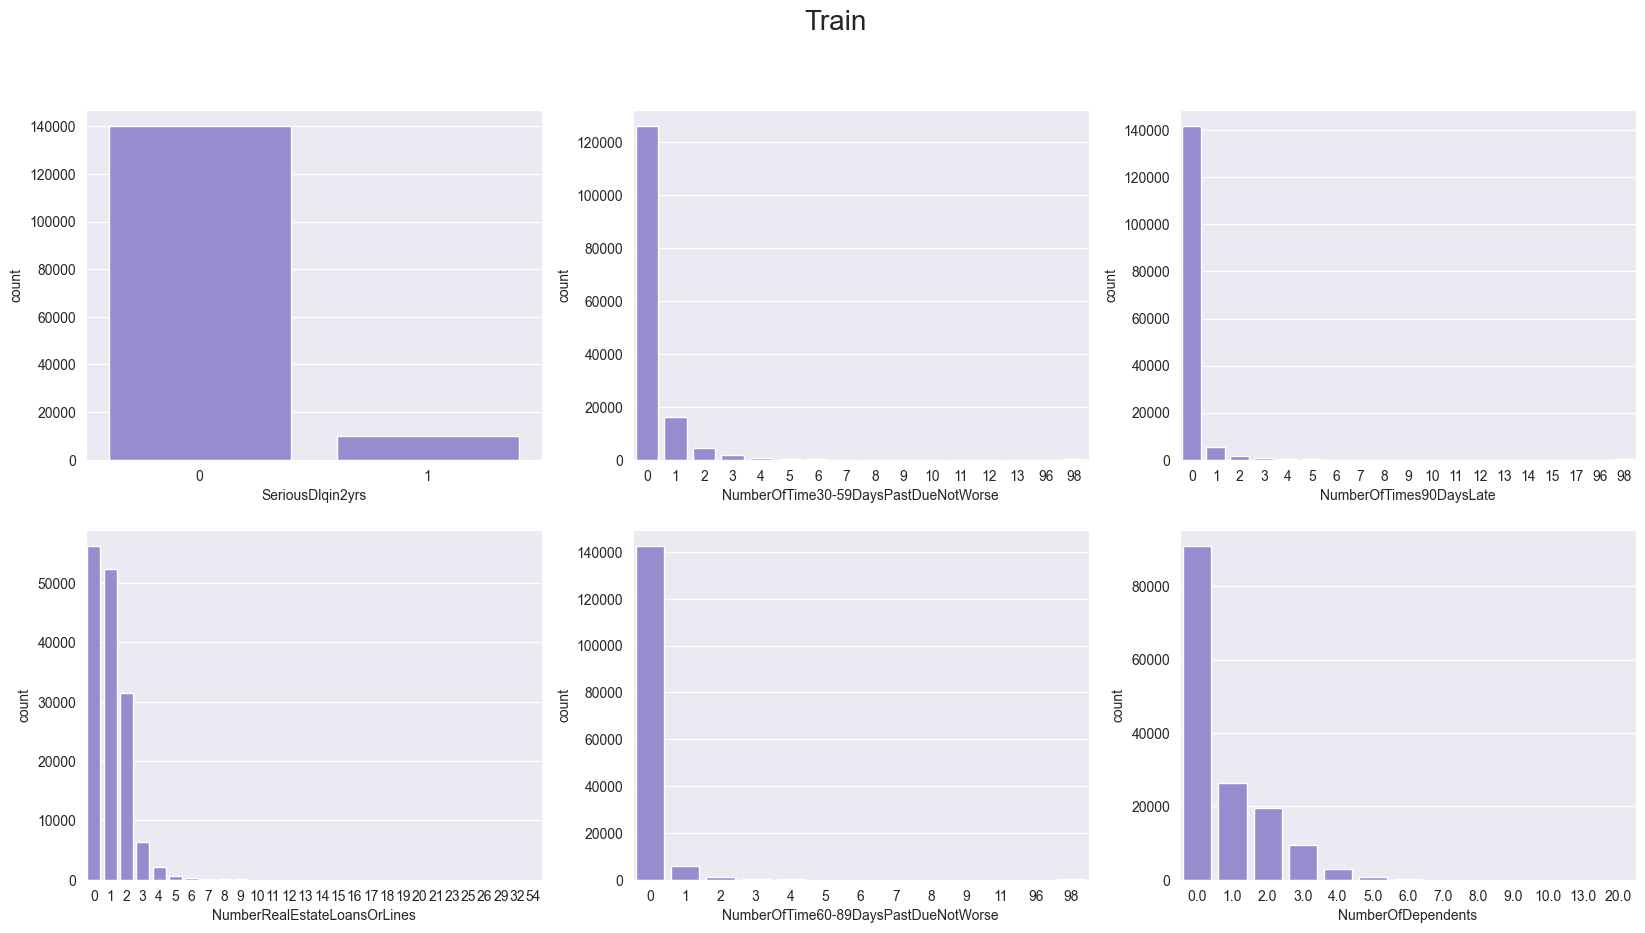

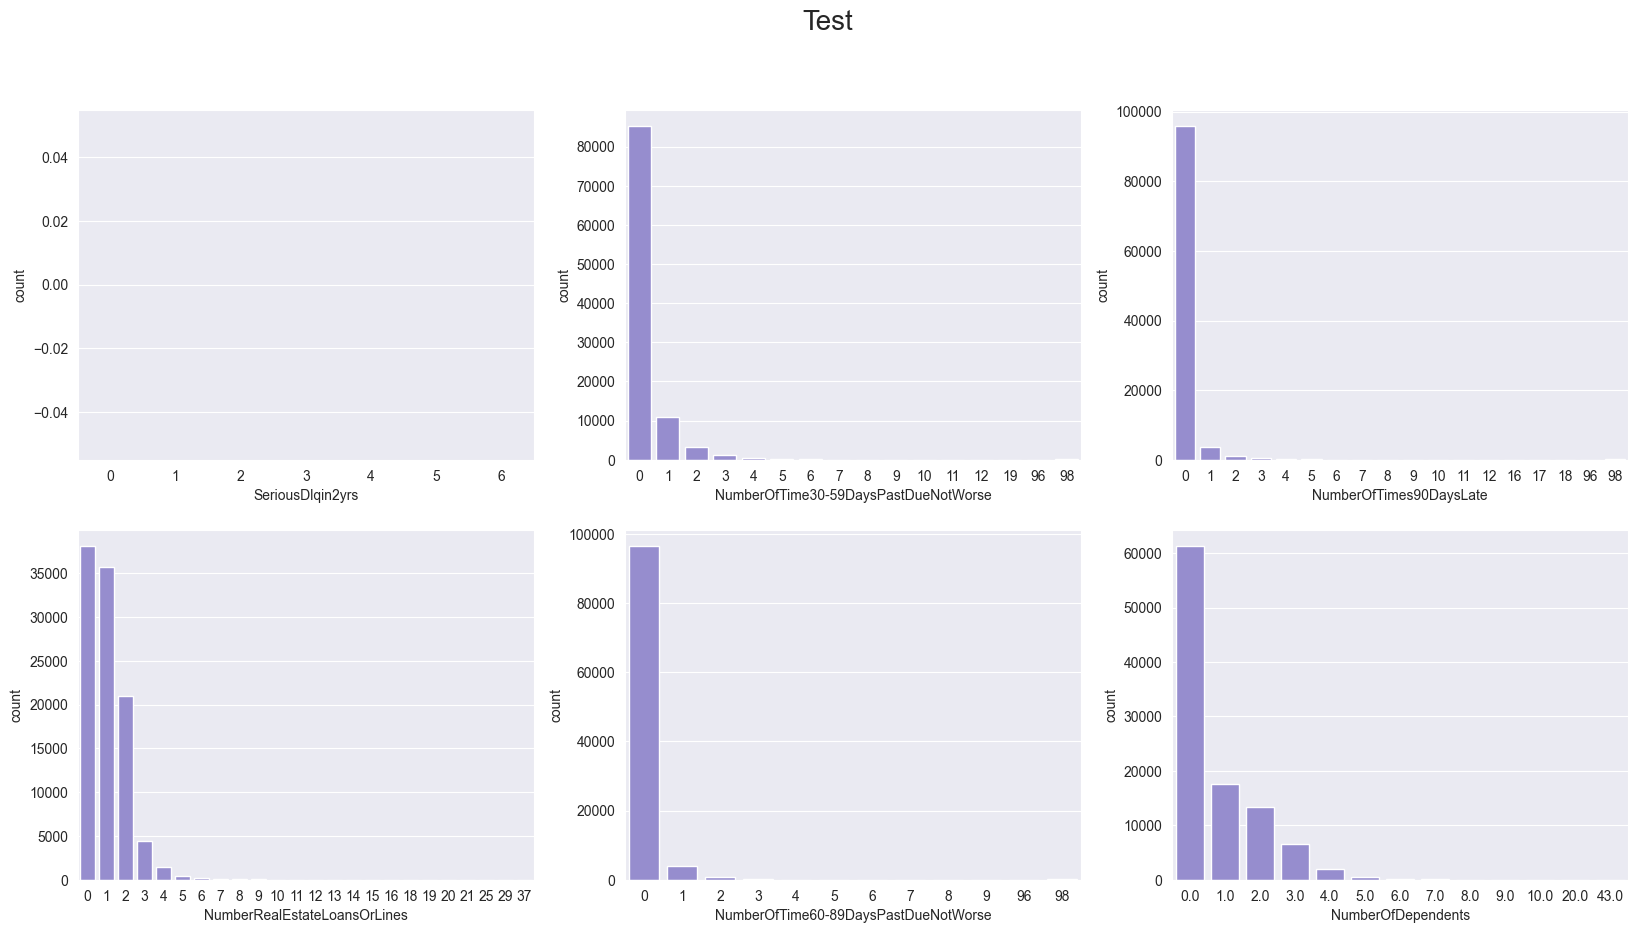

In [24]:
# train
fig, axs = plt.subplots(round(len(cat_features) / 3), 3, figsize=(20, 10))

for i, cat in enumerate(cat_features):
    sns.countplot(data=df_train, x=cat, ax=axs[i // 3, i % 3], color='#8e82d9')
    axs[i // 3, i % 3].tick_params(axis='x')

fig.suptitle('Train', fontsize=20)
plt.show()

# test
fig, axs = plt.subplots(round(len(cat_features) / 3), 3, figsize=(20, 10))

for i, cat in enumerate(cat_features):
    sns.countplot(data=df_test, x=cat, ax=axs[i // 3, i % 3], color='#8e82d9')
    axs[i // 3, i % 3].tick_params(axis='x')

fig.suptitle('Test', fontsize=20)
plt.show()

In [25]:
# print(df_train[df_train['NumberOfTime30-59DaysPastDueNotWorse'] > 5].shape)
# print(df_train[df_train['NumberOfTimes90DaysLate'] > 4].shape)
# print(df_train[df_train['NumberRealEstateLoansOrLines'] > 7].shape)
# print(df_train[df_train['NumberOfTime60-89DaysPastDueNotWorse'] > 3].shape)
# print(df_train[df_train['NumberOfDependents'] > 6].shape)

In [26]:
# print('Число строк до удаления:', df_train.shape[0])

# df_train = df_train[
#     (df_train['NumberOfTime30-59DaysPastDueNotWorse'] <= 5) &
#     (df_train['NumberOfTimes90DaysLate'] <= 4) &
#     (df_train['NumberRealEstateLoansOrLines'] <= 7) &
#     (df_train['NumberOfTime60-89DaysPastDueNotWorse'] <= 3) &
#     (df_train['NumberOfDependents'] <= 6)
# ]

# print('Число строк после удаления:', df_train.shape[0])

In [27]:
# df_train['NumberOfTime30-59DaysPastDueNotWorse'] = np.where(
#     df_train['NumberOfTime30-59DaysPastDueNotWorse'] <= 4, 
#     df_train['NumberOfTime30-59DaysPastDueNotWorse'],
#     5
# )
# df_train['NumberOfTimes90DaysLate'] = np.where(
#     df_train['NumberOfTimes90DaysLate'] <= 3, 
#     df_train['NumberOfTimes90DaysLate'],
#     4
# )
# df_train['NumberRealEstateLoansOrLines'] = np.where(
#     df_train['NumberRealEstateLoansOrLines'] <= 7, 
#     df_train['NumberRealEstateLoansOrLines'],
#     8
# )
# df_train['NumberOfTime60-89DaysPastDueNotWorse'] = np.where(
#     df_train['NumberOfTime60-89DaysPastDueNotWorse'] <= 2, 
#     df_train['NumberOfTime60-89DaysPastDueNotWorse'],
#     3
# )
# df_train['NumberOfDependents'] = np.where(
#     df_train['NumberOfDependents'] <= 5, 
#     df_train['NumberOfDependents'],
#     6
# )

In [28]:
# fig, axs = plt.subplots(round(len(cat_features) / 3), 3, figsize=(20, 10))

# for i, cat in enumerate(cat_features):
#     sns.countplot(data=df_train, x=cat, ax=axs[i // 3, i % 3], color='#8e82d9')

# plt.show()

In [29]:
df_train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

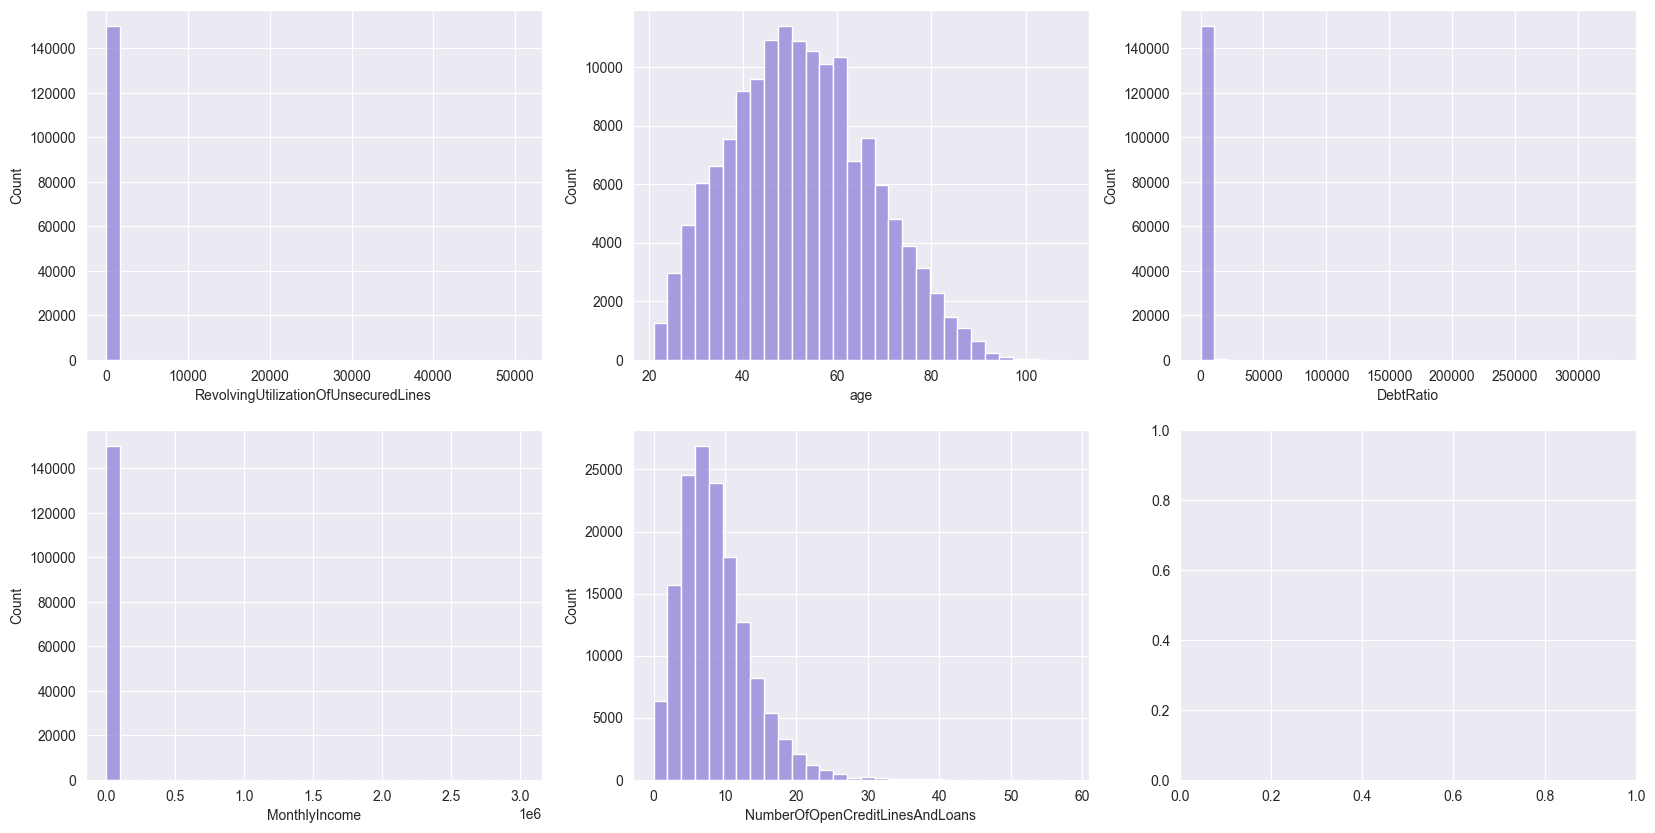

In [30]:
fig, axs = plt.subplots(round(len(num_features) / 3), 3, figsize=(20, 10))

for i, col in enumerate(num_features):
    sns.histplot(data=df_train, x=col, bins=30, ax=axs[i // 3, i % 3], color='#8e82d9')

plt.show()

In [31]:
cols_to_transform = [
    'RevolvingUtilizationOfUnsecuredLines',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans'
]

df_train[cols_to_transform] = np.log2(df_train[cols_to_transform] + 1e-5)
df_test[cols_to_transform] = np.log2(df_test[cols_to_transform] + 1e-5)

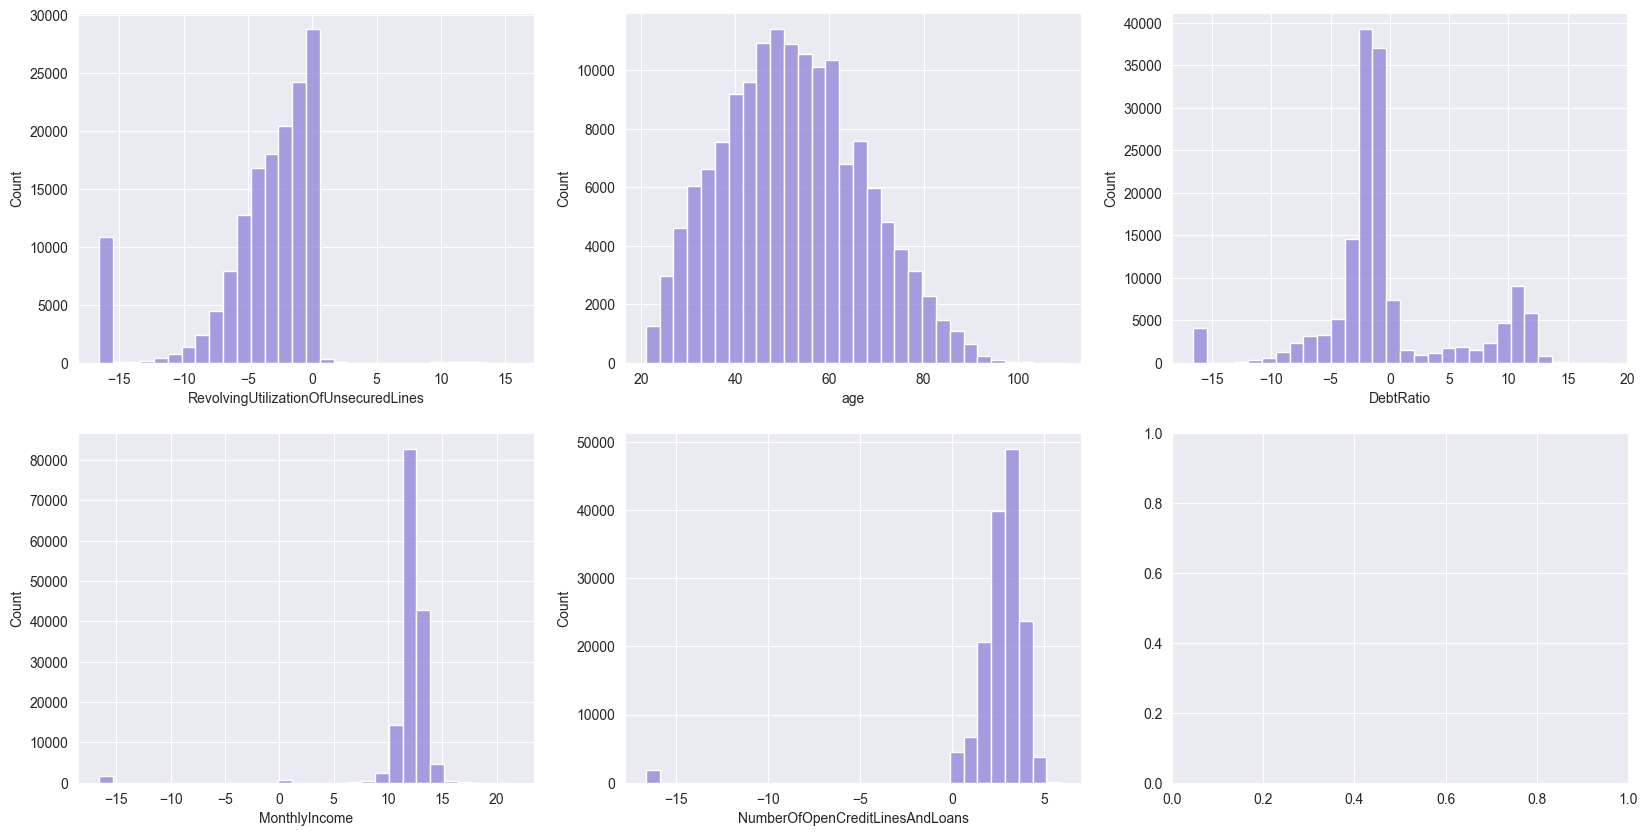

In [32]:
fig, axs = plt.subplots(round(len(num_features) / 3), 3, figsize=(20, 10))

for i, col in enumerate(num_features):
    sns.histplot(data=df_train, x=col, bins=30, ax=axs[i // 3, i % 3], color='#8e82d9')

plt.show()

In [33]:
# print(df_train.query('RevolvingUtilizationOfUnsecuredLines > 3').shape)
# print(df_train.query('DebtRatio > 15').shape)
# print(df_train.query('MonthlyIncome < 5 or MonthlyIncome > 20').shape)
# print(df_train.query('NumberOfOpenCreditLinesAndLoans < -2').shape)

# print('Число строк до удаления:', df_train.shape[0])

# df_train = df_train[
#     (df_train['RevolvingUtilizationOfUnsecuredLines'] <= 3) &
#     (df_train['DebtRatio'] <= 15) &
#     (df_train['MonthlyIncome'] >= 5) & (df_train['MonthlyIncome'] <= 20) &
#     (df_train['NumberOfOpenCreditLinesAndLoans'] >= -2)
# ]

# print('Число строк после удаления:', df_train.shape[0])

In [34]:
# fig, axs = plt.subplots(round(len(num_features) / 3), 3, figsize=(20, 10))

# for i, col in enumerate(num_features):
#     sns.histplot(data=df_train, x=col, bins=30, ax=axs[i // 3, i % 3], color='#8e82d9')

# plt.show()

In [35]:
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,-0.384326,45,2,-0.316542,13.154818,3.700441,0,6,0,2.0
1,0,-0.063166,40,0,-3.036393,11.344296,2.000004,0,0,0,1.0
2,0,-0.603424,38,1,-3.554301,11.570804,1.000007,1,0,0,0.0
3,0,-2.096531,30,0,-4.793470,11.688250,2.321931,0,0,0,0.0
4,0,-0.140429,49,1,-5.325644,15.956467,2.807357,0,1,0,0.0


In [36]:
X_train, y_train = df_train.drop('SeriousDlqin2yrs', axis=1), df_train['SeriousDlqin2yrs']
X_test, y_test = df_test.drop('SeriousDlqin2yrs', axis=1), df_test['SeriousDlqin2yrs']

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.796925,-0.493902,0.376593,-0.001279,0.356670,0.474952,-0.063794,4.409548,-0.057853,1.140539
1,0.870922,-0.832398,-0.100418,-0.471624,-0.203330,-0.242988,-0.063794,-0.901276,-0.057853,0.237210
2,0.746444,-0.967796,0.138087,-0.561186,-0.133270,-0.665195,0.176055,-0.901276,-0.057853,-0.666119
3,0.402423,-1.509389,-0.100418,-0.775475,-0.096944,-0.107067,-0.063794,-0.901276,-0.057853,-0.666119
4,0.853120,-0.223106,0.138087,-0.867504,1.223229,0.097884,-0.063794,-0.016139,-0.057853,-0.666119


In [38]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.80, random_state=42)

# print(X_train.shape, X_val.shape)

In [39]:
y_train.value_counts(normalize=False)

SeriousDlqin2yrs
0    139973
1     10026
Name: count, dtype: int64

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

In [41]:
def get_cv_score(model, cv=5):
    scores = cross_val_score(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
    )

    mean_score = np.array(scores).mean()
    print(f'Mean ROC-AUC score: {mean_score:.4}')

In [44]:
def save_submission(model, filename='submission.csv'):
    y_pred = model.predict_proba(X_test)[:, 1]
    submission = pd.DataFrame({'Id': df_test.index+1, 'Probability': y_pred})
    submission.to_csv(filename, index=False, header=True)

In [45]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced')
get_cv_score(model)

Mean ROC-AUC score: 0.8168


In [47]:
model.fit(X_train, y_train)
save_submission(model, filename='submission.csv')

In [45]:
# model.fit(X_train, y_train)
# y_pred = model.predict(X_val)
# y_pred_proba = model.predict_proba(X_val)[:, 1]

# print(classification_report(y_val, y_pred))
# print(f'ROC-AUC: {round(roc_auc_score(y_val, y_pred_proba), 4)}')

# plt.figure(figsize=(5, 4))
# matrix = confusion_matrix(y_val, y_pred)
# sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
# plt.show()

In [46]:
# model.coef_

In [47]:
# importance = pd.DataFrame({
#     'feature': X_train.columns,
#     'weight': model.coef_.squeeze()
# })

# plt.figure(figsize=(8, 4))
# sns.barplot(data=importance, x='weight', y='feature', color='#8e82d9')
# plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=800, max_depth=10)
get_cv_score(model)

Mean ROC-AUC score: 0.8592


In [49]:
model.fit(X_train, y_train)
save_submission(model, filename='submission.csv')

In [122]:
# model.fit(X_train, y_train)
# y_pred = model.predict(X_val)
# y_pred_proba = model.predict_proba(X_val)[:, 1]
# print(classification_report(y_val, y_pred))
# print(f'ROC-AUC: {round(roc_auc_score(y_val, y_pred_proba), 4)}')

# plt.figure(figsize=(5, 4))
# matrix = confusion_matrix(y_val, y_pred)
# sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
# plt.show()

In [123]:
# importance = pd.DataFrame({
#     'feature': X_train.columns,
#     'weight': model.feature_importances_
# })

# plt.figure(figsize=(8, 4))
# sns.barplot(data=importance, x='weight', y='feature', color='#8e82d9')
# plt.show()

In [297]:
from collections import Counter

cnt = Counter(y_train)
cnt[0.0] / cnt[1.0]

13.869888475836431

In [51]:
%%time
from catboost import CatBoostClassifier, Pool


train_pool = Pool(X_train, y_train)
# val_pool = Pool(X_val, y_val)

model = CatBoostClassifier(
    iterations=10_000,
    learning_rate=5e-3,
    depth=6,
    class_weights=[1, 13.9],
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=0,
    random_seed=42,
    early_stopping_rounds=1000,
    thread_count=-1,
)

get_cv_score(model)

Mean ROC-AUC score: 0.862
CPU times: user 325 ms, sys: 186 ms, total: 511 ms
Wall time: 3min 6s


In [52]:
model.fit(X_train, y_train)
save_submission(model, filename='submission.csv')

In [124]:
# model.fit(train_pool)
# y_pred = model.predict(X_val)
# y_pred_proba = model.predict_proba(X_val)[:, 1]
# print(classification_report(y_val, y_pred))
# print(f'ROC-AUC: {round(roc_auc_score(y_val, y_pred_proba), 4)}')

# matrix = confusion_matrix(y_val, y_pred)
# plt.figure(figsize=(5, 4))
# sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
# plt.show()

In [125]:
# importance = pd.DataFrame({
#     'feature': X_train.columns,
#     'weight': model.feature_importances_
# })

# plt.figure(figsize=(8, 4))
# sns.barplot(data=importance, x='weight', y='feature', color='#8e82d9')
# plt.show()

In [181]:
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

In [182]:
class ClsModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Linear(32, 8),
            nn.ReLU(),
            nn.BatchNorm1d(8),
            nn.Linear(8, 1),
        )

    def forward(self, x):
        return self.model(x)

In [183]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
val_ds = TensorDataset(X_val_tensor, y_val_tensor)

train_dl = DataLoader(train_ds, batch_size=256, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=256, shuffle=False)

In [184]:
model = ClsModel(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(13.9))
optimizer = Adam(model.parameters(), lr=1e-4)

In [187]:
NUM_EPOCHS = 100

In [188]:
from sklearn.metrics import f1_score

In [189]:
for epoch in range(1, NUM_EPOCHS+1):
    model.train()
    for X_batch, y_batch in train_dl:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    model.eval()
    with torch.no_grad():
        y_pred = model(X_val_tensor)
        loss = criterion(y_pred, y_val_tensor)
        preds = torch.sigmoid(y_pred) # .round()
        auc = roc_auc_score(y_val_tensor.detach().numpy(), preds.detach().numpy())

    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss.item():.3f}, roc_auc_score: {auc:.3}')

Epoch: 010, Loss: 0.890, roc_auc_score: 0.85
Epoch: 020, Loss: 0.880, roc_auc_score: 0.854
Epoch: 030, Loss: 0.875, roc_auc_score: 0.855
Epoch: 040, Loss: 0.875, roc_auc_score: 0.856
Epoch: 050, Loss: 0.873, roc_auc_score: 0.857
Epoch: 060, Loss: 0.872, roc_auc_score: 0.857
Epoch: 070, Loss: 0.871, roc_auc_score: 0.858
Epoch: 080, Loss: 0.871, roc_auc_score: 0.858
Epoch: 090, Loss: 0.872, roc_auc_score: 0.858
Epoch: 100, Loss: 0.869, roc_auc_score: 0.859


              precision    recall  f1-score   support

         0.0       0.98      0.81      0.88     28044
         1.0       0.21      0.76      0.33      1956

    accuracy                           0.80     30000
   macro avg       0.60      0.78      0.61     30000
weighted avg       0.93      0.80      0.85     30000

ROC-AUC: 0.8585


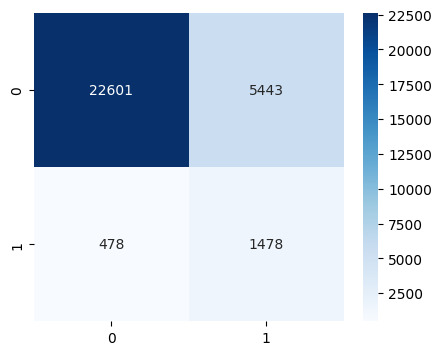

In [191]:
preds_proba = preds
preds = preds.round()
y_val = y_val_tensor.squeeze().numpy()
print(classification_report(y_val, preds))
print(f'ROC-AUC: {round(roc_auc_score(y_val, preds_proba), 4)}')

plt.figure(figsize=(5, 4))
matrix = confusion_matrix(y_val, preds)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

## Предсказание 

In [ ]:
df_test.head()

(101503, 11)

In [126]:
df_test.isna().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [127]:
df_test['MonthlyIncome'] = median_imputer.transform(df_test[['MonthlyIncome']])
df_test['NumberOfDependents'] = moda_imputer.transform(df_test[['NumberOfDependents']])

df_test.isna().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

In [302]:
# df_test['NumberOfTime30-59DaysPastDueNotWorse'] = np.where(
#     df_test['NumberOfTime30-59DaysPastDueNotWorse'] <= 4, 
#     df_test['NumberOfTime30-59DaysPastDueNotWorse'],
#     5
# )

# df_test['NumberOfTimes90DaysLate'] = np.where(
#     df_test['NumberOfTimes90DaysLate'] <= 3, 
#     df_test['NumberOfTimes90DaysLate'],
#     4
# )

# df_test['NumberRealEstateLoansOrLines'] = np.where(
#     df_test['NumberRealEstateLoansOrLines'] <= 7, 
#     df_test['NumberRealEstateLoansOrLines'],
#     8
# )

# df_test['NumberOfTime60-89DaysPastDueNotWorse'] = np.where(
#     df_test['NumberOfTime60-89DaysPastDueNotWorse'] <= 2, 
#     df_test['NumberOfTime60-89DaysPastDueNotWorse'],
#     3
# )

# df_test['NumberOfDependents'] = np.where(
#     df_test['NumberOfDependents'] <= 5, 
#     df_test['NumberOfDependents'],
#     6
# )

In [303]:
# cols_to_transform = [
#     'RevolvingUtilizationOfUnsecuredLines',
#     'DebtRatio',
#     'MonthlyIncome',
#     'NumberOfOpenCreditLinesAndLoans'
# ]

# df_test[cols_to_transform] = np.log2(df_test[cols_to_transform] + 1e-5)

In [128]:
X_test, y_test = df_test.drop('SeriousDlqin2yrs', axis=1), df_test['SeriousDlqin2yrs']

In [129]:
from catboost import CatBoostClassifier, Pool


train_pool = Pool(X_train, y_train)
val_pool = Pool(X_val, y_val)

model = CatBoostClassifier(
    iterations=10_000,
    learning_rate=5e-3,
    depth=6,
    class_weights=[1, 13.9],
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=0,
    random_seed=42,
    early_stopping_rounds=1000,
    thread_count=-1,
)

model.fit(train_pool)

In [131]:
y_preds_proba = model.predict_proba(X_test)[:, 1]

In [132]:
y_preds_proba

array([0.00839816, 0.00726174, 0.01257592, ..., 0.00286669, 0.00051743,
       0.05553351])

In [133]:
y_preds_proba.shape

(101503,)

In [134]:
pd.DataFrame({
    'Id': range(1, len(y_preds_proba) + 1),
    'Probability': y_preds_proba,
}).to_csv('submission.csv', index=False, header=True)

In [138]:
pd.read_csv('submission.csv').head()

,Id,Probability
0,1,0.008398
1,2,0.007262
2,3,0.012576
3,4,0.203833
4,5,0.003559


In [139]:
pd.Series(y_preds_proba.round()).value_counts()

0.0    100132
1.0      1371
Name: count, dtype: int64

In [145]:
pd.Series(model.predict_proba(X_train)[:, 1].round()).value_counts()

0.0    93742
1.0    26257
Name: count, dtype: int64